<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/PVTreports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title PVT reports and fluid characterization
#@markdown This chapter reviews the standard experiments performed by pressure/volume/temperature (PVT) laboratories on reservoir fluid
#@markdown samples: compositional analysis, multistage surface separation,
#@markdown constant composition expansion (CCE), differential liberation expansion (DLE), and constant volume depletion (CVD).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

# Litterature
1. [Whitson and Brule](http://www.ipt.ntnu.no/~curtis/courses/PhD-PVT/PVT-HOT-Vienna-May-2016x/e-notes/PVT-Papers/SPEPBM-Ch6.pdf)
2. https://www.slb.com/-/media/files/oilfield-review/1-pvt
3. http://www.ipt.ntnu.no/~curtis/courses/PVT-Flow/2018-TPG4145/e-notes/PVT-Papers/SPEPBM-Ch6.pdf
4. https://petrowiki.org/Calculating_PVT_properties



# Definitions
## Bubble Point
To understand the drive mechanics of the fluids in an oil well, a test is performed to determine the bubble point of the sample fluid. This test and the subsequent understanding of the bubble test is a crucial component to understanding the characteristics of the reservoir.

A bubble test communicates important information to the geologist about the expected recovery of the oil in a well. If the oil that will be recovered is undersaturated (containing very little dissolved gas), only a small percentage of the oil is recoverable without the use of some advanced recovery method.

## Flash Liberation
Flash liberation is a process involving a sudden pressure change that causes the crude oil to quickly separate or “flash” into in an oil and gas mixture.

## Differential Liberation
In the differential liberation process, the gas that is liberated from the liquid solution is continuously removed from the test sample, as opposed to the flash liberation process that allows the sample solution to reach equilibrium.

## Reservoir to Surface Volume Relations
Determining the bubble point is only one step involved in a thorough PVT analysis. Flash and differential liberation tests yield three other important factors needed to determine the relationship between reservoir to surface volume – oil formation volume factor (Bo), gas formation volume factor (Bg) and solution gas-oil ration (Rs).

## Oil Formation Volume Factor (Bo)
Bο is the ratio of the volume of oil at reservoir conditions to that of surface conditions. It is used to convert the flow rate of oil at the surface to that of reservoir conditions.

## Gas Formation Volume Factor (Bg)
Bg is the ratio of the volume of gas at the reservoir temperature and pressure to the volume at the surface temperature and pressure.

## Solution Gas-Oil Ratio (Rs)
Rs is the amount of gas dissolved in the oil (or water) at any pressure. It increases approximately linearly with pressure, and it is a function of the oil (or water) and gas composition. A heavy oil contains less dissolved gas than a light oil.

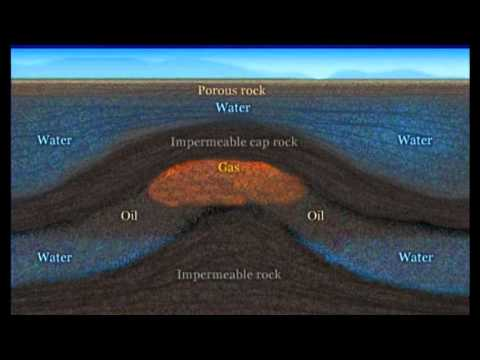

In [2]:
#@title  PVT of reservoir fluids
#@markdown 
from IPython.display import YouTubeVideo
YouTubeVideo('pe71rV92GY8', width=600, height=400)

# Simulation of PVT experiments using NeqSim
In the following sections we will demonstrate examples of PVT studies for oil and gas, and demostrate how to implement the data into NeqSim.




# Fluid sampling
Wireline sampling
Separator tests

# Fluid comppsition analyses
- Gas Chromotography
- Destillation
- Analysis of molecular weight

# Examples of reservoir fluids
In the following data frames various fluids are represented.



Gas Condensate Fluid:

   ComponentName  MolarComposition[-]  MolarMass[kg/mol]  RelativeDensity[-]
0       nitrogen                 0.53                NaN                 NaN
1            CO2                 3.30                NaN                 NaN
2        methane                72.98                NaN                 NaN
3         ethane                 7.68                NaN                 NaN
4        propane                 4.10                NaN                 NaN
5       i-butane                 0.70                NaN                 NaN
6       n-butane                 1.42                NaN                 NaN
7      i-pentane                 0.54                NaN                 NaN
8      n-pentane                 0.67                NaN                 NaN
9       n-hexane                 0.85                NaN                 NaN
10            C7                 1.33             0.0913               0.746
11            C8                 1.33             0.1

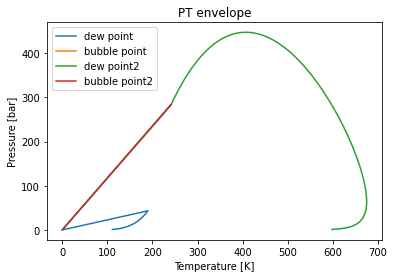

JavaObject id=o230

In [9]:
# Create a gas-condensate fluid
gascondensate = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20"], 
        'MolarComposition[-]':  [0.53, 3.3, 72.98, 7.68, 4.1, 0.7, 1.42, 0.54, 0.67, 0.85, 1.33, 1.33, 0.78, 0.61, 0.42, 0.33, 0.42, 0.24, 0.3, 0.17, 0.21, 0.15, 0.15, 0.8], 
        'MolarMass[kg/mol]': [None,None, None,None,None,None,None,None,None,None,0.0913, 0.1041, 0.1188, 0.136, 0.150, 0.164, 0.179, 0.188, 0.204, 0.216, 0.236, 0.253, 0.27, 0.391],
        'RelativeDensity[-]': [None,None, None,None,None,None,None,None,None,None, 0.746, 0.768, 0.79, 0.787, 0.793, 0.804, 0.817, 0.83, 0.835, 0.843, 0.837, 0.84, 0.85, 0.877]
  } 

gascondensatedf = pd.DataFrame(gascondensate) 
print("Gas Condensate Fluid:\n")
print(gascondensatedf.head(30).to_string())
gascondensateFluid = fluid_df(gascondensatedf, lastIsPlusFraction=True)
print("\nPhase envelope of Gas Condensate Fluid:\n")
phaseenvelope(gascondensateFluid, True)





## 1. Separator test

Separator Test experiments are carried out for both oil and gas condensate mixtures. A sample of reservoir liquid is placed in the laboratory cell and brought to reservoir temperature and bubble-point pressure. Then the liquid is expelled from the cell through a number of stages of separation.  Usually, two or three stages of separation are used, with the last stage at atmospheric pressure and near-ambient temperature (60 to 80°F).

The gas is let out of the separator through the top and is transferred to standard conditions, where its volume is measured. As for the differential liberation experiment, liquid dropping out from the gas is converted to an equivalent gas volume at standard conditions.

The liquid from the ﬁrst separator is let into a second separator at a lower pressure and temperature than the ﬁrst one. At which conditions, more gas will be liberated as sketched in the figure below. As with the gas from the ﬁrst separator, this gas is transferred to standard conditions.

An example of a separator test and a fluid compositoion is given in the following script.

In [0]:
fluid1 = createfluid('black oil')
print('phase envelope for black oil')
TPflash(fluid1)
printFrame(fluid1)
phaseenvelope(fluid1, True)

## 2. Simulation of gas and oil viscosity
The principal factors affecting viscosity are:

* Oil composition
* Temperature
* Dissolved gas
* Pressure

Viscosity increases with decreases in crude oil API gravity (assuming a constant Watson characterization factor) and decreases in temperature. The effect of solution gas is to reduce viscosity. Above saturation pressure, viscosity increases almost linearly with pressure.

In [0]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

gasviscosity = []
oilviscosity = []

viscositysim(fluid1,pressure,temperature,gasviscosity,oilviscosity)

plt.figure()
plt.plot(pressure, gasviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('gasviscosity [kg/msec]')
plt.figure()
plt.plot(pressure, oilviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oilviscosity [kg/msec]')
plt.figure()

## 3. Differential liberation
In differential liberation, gas comes out of solution as pressure is gradually decreased, but is removed from the oil. When reservoir pressure drops below the bubblepoint, flash liberation dominates.

In [0]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

Bo = []
Bg = []
relativegravity = []
Zgas =  []
gasstandardvolume = []
Rs = []
oildensity = []
relativegravity = []

difflib(fluid1,pressure,temperature,Bo, Bg,relativegravity,Zgas,gasstandardvolume,Rs, oildensity, relativegravity)


plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.subplot(132)
plt.plot(pressure, Rs, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [m3/Sm3]')
plt.subplot(133)
plt.plot(pressure, oildensity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oil density [kg/m3]')
plt.show()

## 4. Constant-volume depletion (CVD)
Constant-volume depletion (CVD) experiments are performed on gas condensates and volatile oils to simulate reservoir depletion performance and compositional variation. ... The temperature of the PVT cell is maintained at the reservoir temperature T throughout the experiment.

In [0]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Zmix = []
cummulativemolepercdepleted = []

CVD(fluid1,pressure,temperature,relativevolume, liquidrelativevolume,Zgas,Zmix,cummulativemolepercdepleted)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, cummulativemolepercdepleted, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('cummulative depleted [-]')
plt.show()


## 5. Constant mass expansion (CME)
The bubble point pressure is determined by an experiment called Constant Composition Expansion (CCE). It's also called Constant Mass Expansion (CME) experiment or Pressure-Volume (PV) relationship. ... The cell pressure is controlled by a positive displacement pump and recorded on an accurate pressure gauge.

In [0]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Yfactor = []
isothermalcompressibility = []
satPressure = None
CME(fluid1,pressure,temperature,satPressure,relativevolume, liquidrelativevolume,Zgas,Yfactor,isothermalcompressibility)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, Yfactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Yfactor [-]')
plt.subplot(133)
plt.plot(pressure, isothermalcompressibility, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('isothermalcompressibility [1/bar]')
plt.show()

## 6. Gas Oil Ratio
.....

In [0]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

GORdata = []
Bo = []
GOR(fluid1, pressure, temperature, GORdata, Bo)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, GORdata, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('GORdata [Sm3 gas/Sm3 oil]')
plt.subplot(132)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo[m3/Sm3]')
plt.show()

## 7. Swelling test
A swelling/extraction test is a common phase behavior experiment to determine reservoir fluid volume and composition changes due to CO2 dissolution at reservoir temperature. The test is usually conducted in a constant volume, high pressure view cell initially filled with a predetermined amount of stock-tank oil.

In [0]:
fluid1 = createfluid('black oil')
injectiongas = createfluid('CO2')
relativeoilvolume = []
pressure = []
fluid1.setPressure(100.0)
TPflash(fluid1)
temperature = 301.0
molPercentInjected = [0.0, 1.0, 5.0, 8.0, 10.0, 15.0, 20.0]
swellingtest(fluid1,injectiongas,temperature, molPercentInjected, pressure,relativeoilvolume)

plt.figure()
plt.plot(pressure, relativeoilvolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('swollen volume/initial volume [-]')
plt.show()